In [1]:
# Import pandas
import pandas as pd

# Using the datetime function
import datetime

# For generating word cloud 
import wordcloud

from matplotlib import pyplot as plt

# For loading in the different categories
import json

In [2]:
# Reading the dataset into a dataframe df
df = pd.read_csv('USvideos.csv')

In [3]:
df.shape
# 16 Columns
# 40,949 Rows

(40949, 16)

In [4]:
df.head(1)
# Before 

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [5]:
# Wrangling Step 1
# Changing it to the date_format for better readability 
df["trending_date"] = pd.to_datetime( df["trending_date"], format='%y.%d.%m' ).dt.date

In [6]:
df.head(1)
# After

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [7]:
# Wrangling Step 2
# Slicing out publishing day and publishing hour from publish_time
# https://www.digitalocean.com/community/tutorials/how-to-index-and-slice-strings-in-python-3

df["publishing_day"] = df["publish_time"].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))

df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])

In [8]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Mon,17


In [9]:
# Wrangling Step 3

# Convert it into a datetime object
publish_time = pd.to_datetime(df.publish_time, format='%Y-%m-%dT%H:%M:%S.%fZ')

# Slicing out publish_date and publish_time_only 
# dt.date - helps in retrieving the underlying date 
df['publish_date'] = publish_time.dt.date

# dt.time helps in retrieving the underlying time 
df['publish_time_only'] = publish_time.dt.time

# Drop publish_time
df.drop('publish_time',axis=1,inplace=True)

# Just for better readability 
df['days_to_trending'] = (df.trending_date - df.publish_date).dt.days

In [10]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Mon,17,2017-11-13,17:13:01,1


In [11]:
# Wrangling Step 4
# Setting Index 
#df.set_index(['trending_date','video_id'],inplace=True)

In [12]:
#df.head(3)

In [13]:
# Cleaning Error 1:
# Checking and Cleaning NaN values 

In [14]:
df[df["title"].apply(lambda x: pd.isna(x))].head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending


In [15]:
df[df["channel_title"].apply(lambda x: pd.isna(x))].head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending


In [16]:
df[df["views"].apply(lambda x: pd.isna(x))].head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending


In [17]:
df[df["likes"].apply(lambda x: pd.isna(x))].head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending


In [18]:
df[df["dislikes"].apply(lambda x: pd.isna(x))].head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending


In [19]:
df[df["comment_count"].apply(lambda x: pd.isna(x))].head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending


In [20]:
# Displays the top 2 NaN values 
df[df["description"].apply(lambda x: pd.isna(x))].head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending
42,NZFhMSgbKKM,2017-11-14,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN,Mon,15,2017-11-13,15:11:00,1
47,sbcbvuitiTc,2017-11-14,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN,Fri,18,2017-11-10,18:23:05,4


In [21]:
# Cleaning Work - Filling the NaN values with blank spaces
df["description"] = df["description"].fillna(value="")

In [22]:
# Cleaning Error 2 :
# Checking for videos which have an error or have been removed
df[ df["video_error_or_removed"] == True ].head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending
2203,RK_B4Ez4_5Q,2017-11-25,Verizon 360 Live: The Macy’s Thanksgiving Day ...,Verizon,24,"live stream|""360 video""|""fun videos for kids""|...",2618344,45197,2315,3332,https://i.ytimg.com/vi/RK_B4Ez4_5Q/default.jpg,False,False,True,"This year, we hid special offers throughout th...",Thu,19,2017-11-23,19:51:07,2
15499,kZete48ZtsY,2018-02-01,Deleted video,Midnight Video,1,"horror|""horror short""|""short""|""short film""|""my...",60262,4804,122,736,https://i.ytimg.com/vi/-V1Oo7srGf0/default.jpg,False,False,True,After dusting off an old Mystery Date-style bo...,Mon,13,2018-01-29,13:00:00,3


In [23]:
# Cleaning Work : 
# Keeping only those videos which do not have any errors
df = df[~df.video_error_or_removed]

In [24]:
df[ df["video_error_or_removed"] == True ]

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending


In [25]:
df.shape
# 23 rows eliminated

(40926, 20)

In [26]:
# Cleaning Error 3 -
# Checking for duplicate values of video_id
print( df["video_id"].nunique() )

# Clearly, total number of videos is not same as number of unique video_ids
# Need to manually remove distinct video ids

6348


In [27]:
# Cleaning Error 4 -
# Checking the ratings_disabled status
df[ df["ratings_disabled"] == True ].head(2)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending
1435,Kn5UgGQukYQ,2017-11-21,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",15058,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,Fri,21,2016-10-14,21:14:51,403
1667,Kn5UgGQukYQ,2017-11-22,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",34207,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,Fri,21,2016-10-14,21:14:51,404


In [28]:
# Cleaning Work : 
# Keeping only those videos which do not have their ratings disabled
df = df[~df.ratings_disabled]

In [29]:
df.shape
# 169 rows eliminated

(40757, 20)

In [30]:
df["title_length"] = df["title"].apply(lambda x: len(x))

In [31]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,comments_disabled,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending,title_length
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Mon,17,2017-11-13,17:13:01,1,34


In [32]:
# Storing the different words from the video title in title_words
# split() - splits the string into a list, default separater is blank space 
# Here, every title is stored as a list
title_words = list(df["title"].apply(lambda x: x.split()))

In [33]:
# Iterating through the list again
# To store all the words in the form of a list
# Here, the words of a title are further separated 
title_words = [x for y in title_words for x in y]

In [34]:
#title_words[1:3]

(-0.5, 1199.5, 499.5, -0.5)

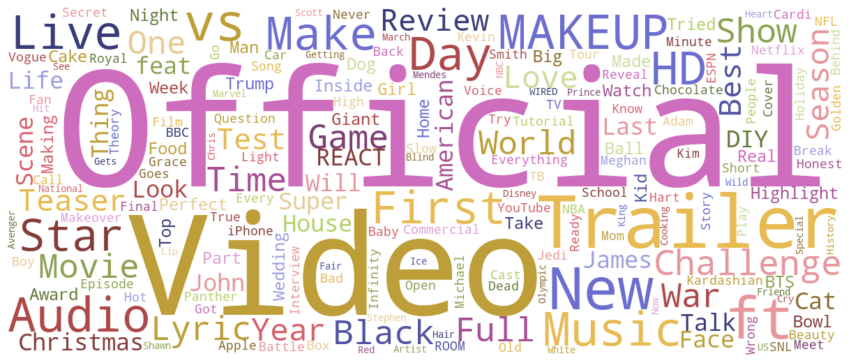

In [35]:
# Generating word cloud

# https://stackoverflow.com/questions/43954114/python-wordcloud-repetitve-words

wc = wordcloud.WordCloud(background_color="white", width = 1200, height = 500, collocations = False, colormap="tab20b").generate(" ".join(title_words))

plt.figure(figsize=(15,10))

# https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
plt.imshow(wc, interpolation='bilinear')

plt.axis("off")

In [36]:
# Counter counts the number of occurences of every word
from collections import Counter
Counter(title_words)

Counter({'WE': 155,
         'WANT': 7,
         'TO': 537,
         'TALK': 45,
         'ABOUT': 16,
         'OUR': 97,
         'MARRIAGE': 19,
         'The': 5734,
         'Trump': 232,
         'Presidency:': 7,
         'Last': 307,
         'Week': 220,
         'Tonight': 59,
         'with': 1617,
         'John': 356,
         'Oliver': 35,
         '(HBO)': 56,
         'Racist': 40,
         'Superman': 29,
         '|': 10580,
         'Rudy': 85,
         'Mancuso,': 19,
         'King': 116,
         'Bach': 30,
         '&': 2024,
         'Lele': 88,
         'Pons': 83,
         'Nickelback': 14,
         'Lyrics:': 7,
         'Real': 211,
         'or': 192,
         'Fake?': 7,
         'I': 1937,
         'Dare': 12,
         'You:': 17,
         'GOING': 25,
         'BALD!?': 6,
         '2': 668,
         'Weeks': 7,
         'iPhone': 177,
         'X': 216,
         'Roy': 48,
         'Moore': 59,
         'Jeff': 35,
         'Sessions': 11,
         'Co

In [37]:
# Adding Channel Categories

# Opening the json file
# Storing the items in a list named different_categories
with open("C:/Users/Gayatri Aniruddha/Desktop/Sem 1 2020/Visualisation/Data Exploration Project/US_category_id.json") as cat:
    different_categories = json.load(cat)["items"]
    
# Creating an empty dictionary 
category_dict = {}

# Extracting the id and title from the categories
for each in different_categories:
    category_dict[int(each["id"])] = each["snippet"]["title"]

# Creating a new column called category name 
df['category_name'] = df['category_id'].map(category_dict)

In [38]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,publishing_day,publishing_hour,publish_date,publish_time_only,days_to_trending,title_length,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Mon,17,2017-11-13,17:13:01,1,34,People & Blogs


In [40]:
df.to_csv(r'C:\Users\Gayatri Aniruddha\Desktop\Sem 1 2020\Visualisation\Data Exploration Project\Trial_4.csv')